In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [2]:
converted_file_prefix = 'tri_hex_mono'
df = pd.read_excel('tri_hex_mono.xlsx')
df.to_csv(converted_file_prefix + ".csv")
data = pd.read_csv('tri_hex_mono.csv')

In [3]:
X = data.iloc[:,2:26]
y = data.iloc[:, 27]

In [4]:
feature_name = data.drop(['band_gap', 'form_ene', 'Unnamed: 0','compound','mat_id'], axis = 1).columns

In [5]:
feature_name

Index(['atm_ra', 'atm_rb', 'cov_ra', 'cov_rb', 'vdw_ra', 'vdw_rb', 'atm_ma',
       'atm_mb', 'e_negt_a', 'e_negt_b', 'e_aff_a', 'e_aff_b', 'ion_e_a',
       'ion_e_b', 'a', 'b', 'c', 'alpha', 'beta', 'gamma', 'density', 'No_atm',
       'space_grp', 'mag_mom'],
      dtype='object')

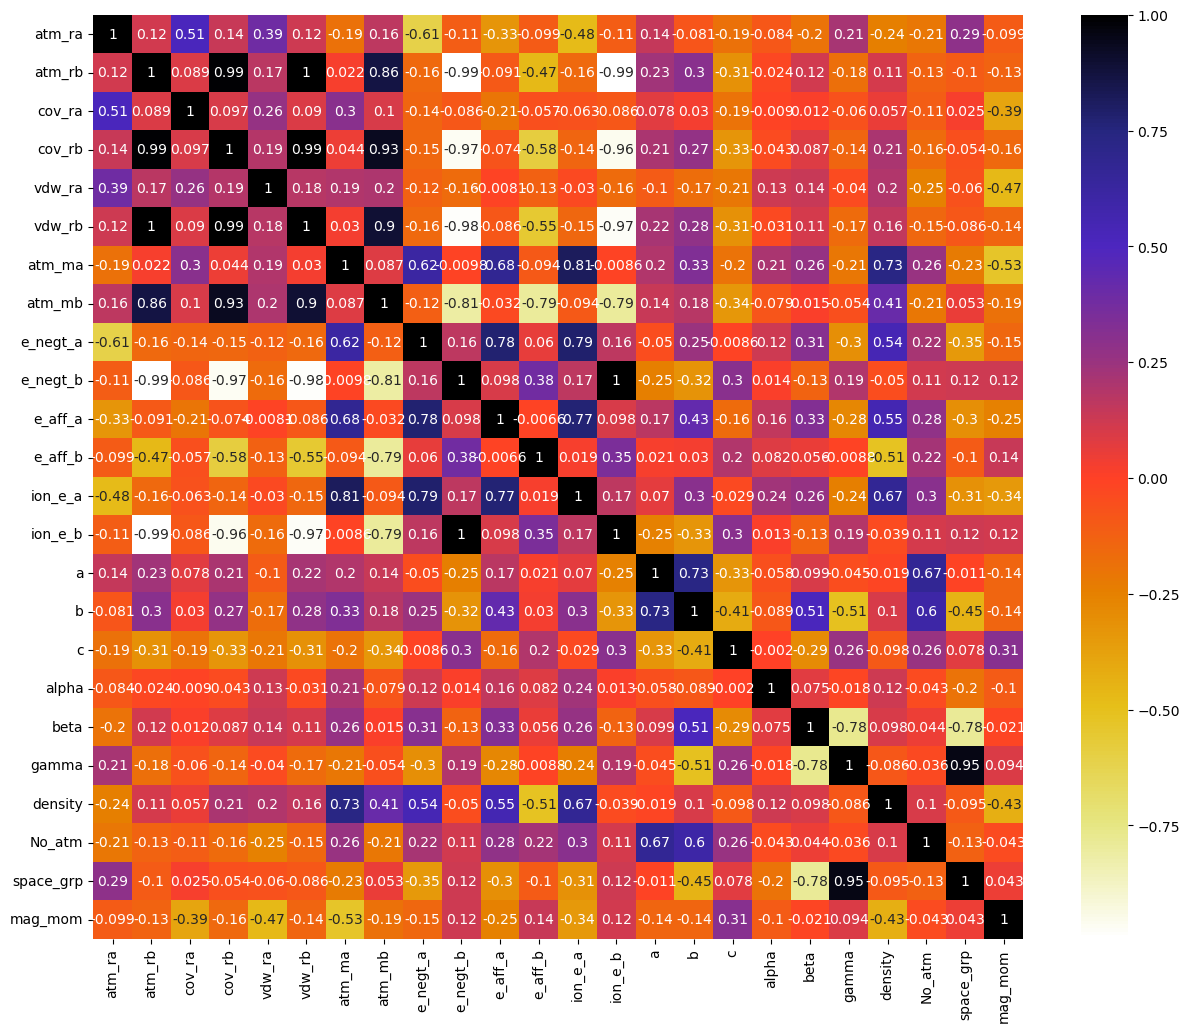

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,12))
cor = X.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.savefig('corr90.png')
plt.show()

In [7]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [8]:
corr_features = correlation(X, 0.85)
len(set(corr_features))

6

In [9]:
corr_features

{'atm_mb', 'cov_rb', 'e_negt_b', 'ion_e_b', 'space_grp', 'vdw_rb'}

In [10]:
X = X.drop(['atm_mb', 'cov_rb', 'e_negt_b', 'ion_e_b', 'space_grp', 'vdw_rb'], axis=1)

In [11]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [12]:
X_train.shape, X_test.shape

((59, 18), (11, 18))

In [13]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
regressor = linear_model.Lasso(alpha = 0.01, positive = True, fit_intercept = False)
regressor.fit(scaler.transform(X_train),y_train)

Lasso(alpha=0.01, fit_intercept=False, positive=True)

In [17]:
import eli5
eli5.show_weights(regressor,top= 5, feature_names = X_train.columns.tolist() )

In [18]:
coeffi = regressor.coef_

In [19]:
coeffi

array([0.24702743, 0.08148342, 0.        , 0.17262807, 0.        ,
       0.        , 0.19163952, 0.00685237, 0.23812306, 0.        ,
       0.03168269, 0.09471306, 0.0488553 , 0.        , 0.02982504,
       0.        , 0.        , 0.06114449])